In [145]:
import pandas as pd
import numpy as np

In [322]:
df=pd.read_csv(r"D:\Social_media\twitter_training.csv")
df.columns=["Twitter_ID","Entity","Sentiment","Comment"]
df.head()


,Twitter_ID,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [323]:
df.shape

(74681, 4)

In [330]:
df=df.drop_duplicates()
df

,Twitter_ID,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [331]:
df.Sentiment.value_counts()

Sentiment
Negative      21787
Positive      19810
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

In [332]:
df.isnull().sum()

Twitter_ID      0
Entity          0
Sentiment       0
Comment       326
dtype: int64

In [333]:
df.dtypes

Twitter_ID     int64
Entity        object
Sentiment     object
Comment       object
dtype: object

In [334]:
df=df.dropna(subset=["Comment"])
df

,Twitter_ID,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [335]:
df.isnull().sum()

Twitter_ID    0
Entity        0
Sentiment     0
Comment       0
dtype: int64

In [112]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [113]:
stemmer=PorterStemmer()
stopword=stopwords.words('english')

In [308]:
df.head()

,Twitter_ID,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [193]:
def preprocessed_text(text):
    txt=re.sub(r'[^a-zA-Z\s]', '',text,re.I|re.A)
    tokenized_txt=re.split('\W+',txt)
    txt_without_stopwords=" ".join([stemmer.stem(word) for word in tokenized_txt if word not in stopword])
    return txt_without_stopwords


In [218]:
def punct_count(text):
    trimmed_text = text.strip()
    count = sum([1 for char in trimmed_text if char in string.punctuation])
    text_len = len(trimmed_text.replace(" ", ""))
    if text_len == 0:
        return 0
    return round((count / text_len) * 100, 3)

In [379]:
df.loc[:,"punct%"]=df["Comment"].apply(lambda x: punct_count(x))
df.head()


,Twitter_ID,Entity,Sentiment,Comment,punct%,body_len
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,2.500,40
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,2.439,41
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,2.381,42
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,2.174,46
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,2.273,44


In [310]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [311]:
print("Total number of positive {} and negative {} comments".format(len(df[df["Sentiment"]=="Positive"]),len(df[df["Sentiment"]=="Negative"])))

Total number of positive 19845 and negative 21790 comments


In [381]:
df.loc[:,"body_len"]=df["Comment"].apply(lambda x: len(x)-x.count(" "))
df.head()

,Twitter_ID,Entity,Sentiment,Comment,punct%,body_len
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,2.500,40
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,2.439,41
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,2.381,42
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,2.174,46
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,2.273,44


In [144]:
import matplotlib.pyplot as plt


In [338]:
bins=np.linspace(0,200,40)

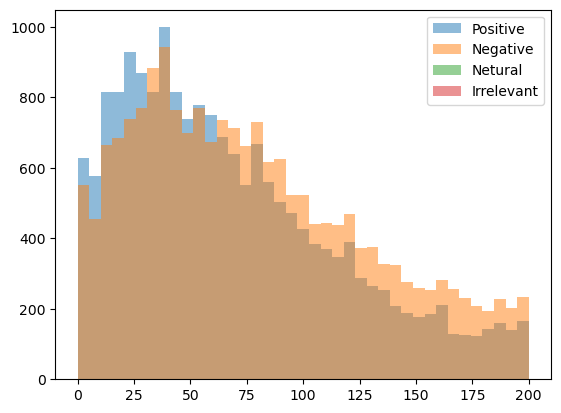

In [313]:
plt.hist(df[df["Sentiment"]=="Positive"]["body_len"],bins,alpha=0.5,label="Positive")
plt.hist(df[df["Sentiment"]=="Negative"]["body_len"],bins,alpha=0.5,label="Negative")
plt.hist(df[df["Sentiment"]=="Netural"]["body_len"],bins,alpha=0.5,label="Netural")
plt.hist(df[df["Sentiment"]=="irrelevant"]["body_len"],bins,alpha=0.5,label="Irrelevant")
plt.legend(loc="upper right")
plt.show()

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [340]:
print(x_vect_train.shape)

(71655, 29)


In [290]:
df1=pd.read_csv(r"D:\Social_media\twitter_validation.csv")
df1.columns=["ID","Entity","Sentiment","Comment"]
df1.head()

,ID,Entity,Sentiment,Comment
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [346]:
test_data["punct%"]=df["Comment"].apply(lambda x:punct_count(x))
test_data.head()

,Twitter_ID,Entity,Sentiment,Comment,punct%
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2.500
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,2.439
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",2.381
3,4433,Google,Neutral,Now the President is slapping Americans in the...,2.174
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,2.273


In [369]:
test_data["body_len"]=test_data["Comment"].apply(lambda x: len(x)-x.count(" "))
test_data.head()

,Twitter_ID,Entity,Sentiment,Comment,punct%,boby_len,body_len
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2.500,94,94
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,2.439,75,75
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",2.381,59,59
3,4433,Google,Neutral,Now the President is slapping Americans in the...,2.174,145,145
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,2.273,217,217


In [370]:
test_data.head()

,Twitter_ID,Entity,Sentiment,Comment,punct%,boby_len,body_len
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,2.500,94,94
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,2.439,75,75
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",2.381,59,59
3,4433,Google,Neutral,Now the President is slapping Americans in the...,2.174,145,145
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,2.273,217,217


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [372]:
tfidf_vect=TfidfVectorizer(analyzer=preprocessed_text)
tfidf_vect_fit=tfidf_vect.fit(df["Comment"])
tfidf_train=tfidf_vect_fit.transform(df["Comment"])
tfidf_test=tfidf_vect_fit.transform(test_data["Comment"])
x_vect_train=pd.concat([df[["body_len","punct%"]].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())],axis=1)
x_vect_test=pd.concat([test_data[["body_len","punct%"]].reset_index(drop=True),
                          pd.DataFrame(tfidf_test.toarray())],axis=1)
x_vect_train.head()


,body_len,punct%,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,24,25,26
0,40,2.500,0.539471,0.000000,0.199160,0.164469,0.168518,0.283662,0.0,0.000000,...,0.0,0.303088,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,41,2.439,0.407952,0.144597,0.200809,0.000000,0.339825,0.286010,0.0,0.184199,...,0.0,0.305597,0.0,0.145410,0.000000,0.0,0.0,0.0,0.0,0.0
2,42,2.381,0.331382,0.117457,0.163118,0.134705,0.414063,0.348491,0.0,0.000000,...,0.0,0.496476,0.0,0.000000,0.142136,0.0,0.0,0.0,0.0,0.0
3,46,2.174,0.352933,0.125095,0.173726,0.000000,0.440991,0.371155,0.0,0.159357,...,0.0,0.528764,0.0,0.125799,0.151379,0.0,0.0,0.0,0.0,0.0
4,44,2.273,0.352933,0.125095,0.173726,0.000000,0.440991,0.371155,0.0,0.159357,...,0.0,0.528764,0.0,0.125799,0.151379,0.0,0.0,0.0,0.0,0.0


In [375]:
y_train=df["Sentiment"]
y_test=test_data["Sentiment"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [373]:
x_vect_train.columns=x_vect_train.columns.astype(str)
model=RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
model.fit(x_vect_train,y_train)


RandomForestClassifier(n_estimators=150, n_jobs=-1)

0.7657657657657657


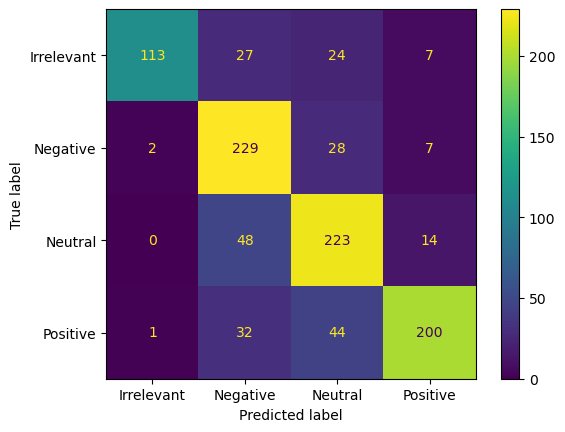

In [376]:
x_vect_test.columns=x_vect_test.columns.astype(str)
y_pred=model.predict(x_vect_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [384]:
def predict_sentiment(new_comment):
    new_data = pd.DataFrame({'Comment': [new_comment]})
    new_data["body_len"] = new_data["Comment"].apply(lambda x: len(x)-x.count(" "))
    new_data["punct%"] = new_data["Comment"].apply(lambda x: punct_count(x))
    tfidf_new = tfidf_vect.transform(new_data["Comment"])
    x_new = pd.concat([new_data[["body_len", "punct%"]].reset_index(drop=True), pd.DataFrame(tfidf_new.toarray())], axis=1)
    x_new.columns=x_new.columns.astype(str)
    prediction = model.predict(x_new)
    return prediction[0]

In [389]:
new_comment = input("Enter the comment:")
predicted_sentiment = predict_sentiment(new_comment)
print("The predicted sentiment for the comment is:",predicted_sentiment)

Enter the comment:I love this new feature!
The predicted sentiment for the comment is: Positive
